In [7]:
import nltk
from urllib import request
from nltk.tokenize import RegexpTokenizer

1. Choose a corpus of interest  

Here I've chosen an example included within the text, _Crime and Punishment_ by Fyodor Dostoevsky

In [8]:
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')
raw[:100]

'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\nThis eBook is for the '

2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).

In [17]:
tokenizer = RegexpTokenizer(r'[a-z]+')  # use a regex tokenizer to parse out words, excluding numbers and punctuation 
tokens = tokenizer.tokenize(raw)  # apply the tokenizer to separate raw text into separate words 
text = nltk.Text(tokens)  # create an NLTK text 
words = [w.lower() for w in text]  # normalize words 
vocab = sorted(set(words))  # build vocabulary 

print('first 10 vocab words: ' + str(vocab[:10]))
print('last 10 vocab words: ' + str(vocab[-10:]))
print('unique words: %d' % len(vocab))

first 10 vocab words: ['a', 'aback', 'abandon', 'abandoned', 'abandoning', 'abasement', 'aberration', 'abide', 'abiding', 'ability']
last 10 vocab words: ['yourselves', 'youth', 'youthful', 'yprus', 'yrolese', 'yrus', 'zeal', 'zest', 'zigzags', 'zip']
unique words: 10174


3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [25]:
fdist = nltk.FreqDist(words)

import pandas as pd

# convert fdist dictionary into dataframe (although I'm sure there's a more elegant way to do this)
df_vocab = pd.DataFrame.from_dict(fdist, orient='index')
df_vocab.reset_index(inplace=True)
df_vocab.columns = ['vocab', 'count']
df_vocab.sort_values('count', ascending=False, inplace=True)
df_vocab.reset_index(drop=True, inplace=True)
df_vocab.head()

,vocab,count
0,the,7445
1,and,6291
2,to,5417
3,he,4637
4,a,4488


In [27]:
# loop through sorted dataframe until cumulative words exceeds 50% of total words 
cumulative_words = 0 
idx = 0
while cumulative_words / len(words) < 0.5: 
    cumulative_words += df_vocab.loc[idx, 'count']
    idx += 1
print('number of unique words representing half of total words: %d' % (idx - 1))

number of unique words representing half of total words: 74


4. Identify the 200 highest frequency words in this corpus.

In [31]:
# fortunately, the dataframe lends itself to answering this question as well... 
df_vocab.loc[:200, 'vocab'].values

array(['the', 'and', 'to', 'he', 'a', 'of', 'you', 'in', 'that', 'it',
       'was', 'his', 'at', 's', 't', 'her', 'not', 'with', 'for', 'him',
       'had', 'on', 'is', 'e', 'she', 'all', 'as', 'be', 'but', 'have',
       'me', 'are', 'so', 'askolnikov', 'what', 'nd', 'my', 'hat', 'from',
       'were', 'ut', 'out', 'up', 'your', 'this', 'there', 'ou', 'they',
       'them', 'one', 'been', 'or', 'an', 'by', 'would', 'o', 'here',
       'will', 'am', 'about', 'know', 'said', 'no', 'too', 'now', 'could',
       'do', 'man', 'did', 'like', 'if', 'very', 'come', 'only', 'more',
       'though', 'into', 'onia', 'how', 'can', 'again', 'time', 'has',
       'some', 'don', 'see', 'who', 'll', 'when', 'went', 'then', 'go',
       'azumihin', 'once', 'we', 'himself', 'which', 'ounia', 'before',
       'even', 'thought', 'vanovna', 'down', 'must', 'say', 'looked',
       've', 'etrovitch', 'day', 'something', 'room', 'little', 'such',
       'last', 'still', 'just', 'began', 'away', 'suddenly', 

5. Create a graph that shows the relative frequency of these 200 words.

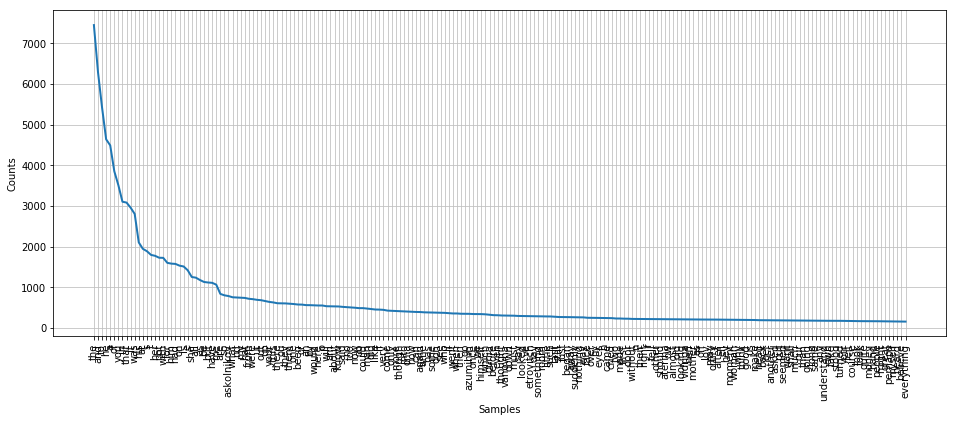

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(3,figsize=(16,6)) 
fdist.plot(200)
plt.show()

6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

According to Zipf's law, "given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n... Thus the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, etc." 

Based on the top 10 words shown below, our corpus does not quite fit the law. You actually have to get to the 5th ranked word "of" before you get to half the frequency of the most frequent word. 

In [43]:
df_vocab[:10]

,vocab,count
0,the,7445
1,and,6291
2,to,5417
3,he,4637
4,a,4488
5,of,3851
6,you,3508
7,in,3103
8,that,3082
9,it,2957


7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora."

As mentioned above, Zipf's law, which is an observation of all corpora in general, does not seem to apply very well to this corpus. The drop off in frequency is not as steep as Zipf's law would suggest. This may be because the text was translated from another language into English or it may be a function of when this text was written. 
